#VISUALIZACIÓN DE FILTROS CONVOLUCIONALES

##1. Preparación de datos

In [1]:
## CARGA DE DATOS
## =============================================================================

!unrar x 'drive/MyDrive/TFM/Datasets/dataset_undersampling.rar'

Se han truncado las últimas 5000 líneas del flujo de salida.
Extracting  dataset_undersampling/train/Normal/Normal-2451.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2453.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2454.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2455.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2458.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2459.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-246.png             68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2460.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2464.png            68%  OK 
Extracting  dataset_undersampling/train/Normal/Normal-2465.png            68%  OK 
Extracting  dataset

In [3]:
## Uso de Tensorflow 2.
## =============================================================================

%tensorflow_version 2.x

In [4]:
## Importación de las librería necesarias
## ==================================================

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import models
from tensorflow.keras.models    import  load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import random

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # imprimimos en pantalla el resultado de todos los statements

In [5]:
## DIRECTORIOS
## =============================================================================

base_dir =  'drive/MyDrive/TFM/Convolutional-Regular/'
train_dir = 'dataset_undersampling/train'
test_dir  = 'dataset_undersampling/test'

In [6]:
## GENERADOR DE IMÁGENES (Ayuda a cargar y transformar las imágenes por lotes )
## =============================================================================

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (224, 224),                 
        batch_size  = 32,
        shuffle=True,
        color_mode='grayscale',
        class_mode  ='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (224, 224),
        batch_size  = 32,
        shuffle=True,
        color_mode='grayscale',
        class_mode  = 'categorical')

Found 13178 images belonging to 4 classes.
Found 3296 images belonging to 4 classes.


In [7]:
## CATEGORÍAS
## =============================================================================

classes = list(test_generator.class_indices.keys())
classes

['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

##2. Visualización sin segmentación

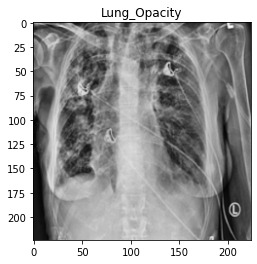

In [8]:
## IMAGEN ALEATORIA A VISUALIZAR
## =============================================================================

from random import randrange
index = randrange(32)

img = test_generator[0][0][index]
img = np.dstack([img, img, img])
plt.imshow(img)
category = np.argmax(test_generator[0][1][index])
plt.title(f'{classes[category]}');

In [9]:
img_tensor = test_generator[0][0][index]
img_tensor = np.expand_dims(img_tensor, axis = 0)

In [10]:
## CARGA DEL MODELO (Convolucional 1 sin segmentación)
## =============================================================================

model   = load_model(base_dir + 'Convolutional-Regularmodel.h5')

In [13]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs[16]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor);

In [14]:
## VISUALIZACIÓN
## =============================================================================

layer_names = []
for layer in model.layers[:18]:
    layer_names.append(layer.name)
    
images_per_row = 16

image_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # Número de canales de salida por cada capa de red
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')

            
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show();  

Output hidden; open in https://colab.research.google.com to view.

##3. Visualización con segmentación

In [15]:
## PREPARACIÓN DE DATOS
## =============================================================================

!unrar x 'drive/MyDrive/TFM/Datasets/dataset_segmentation.rar'

Se han truncado las últimas 5000 líneas del flujo de salida.
Extracting  dataset_segmentation/train/Normal/Normal-2451.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2453.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2454.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2455.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2458.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2459.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-246.png              66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2460.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2464.png             66%  OK 
Extracting  dataset_segmentation/train/Normal/Normal-2465.png             66%  OK 
Extracting  dataset

In [16]:
## DIRECTORIOS
## =============================================================================

train_dir = 'dataset_segmentation/train'
test_dir  = 'dataset_segmentation/test'

In [17]:
## GENERADOR DE IMÁGENES (Ayuda a cargar y transformar las imágenes por lotes )
## =============================================================================

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (224, 224),                 
        batch_size  = 32,
        shuffle=True,
        color_mode='grayscale',
        class_mode  ='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (224, 224),
        batch_size  = 32,
        shuffle=True,
        color_mode='grayscale',
        class_mode  = 'categorical')

Found 13178 images belonging to 4 classes.
Found 3296 images belonging to 4 classes.


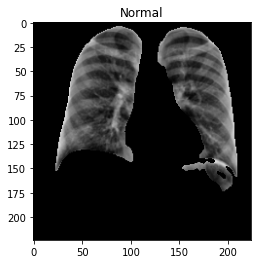

In [18]:
## IMAGEN ALEATORIA A VISUALIZAR
## =============================================================================

index = randrange(32)

img = test_generator[0][0][index]
img = np.dstack([img, img, img])
plt.imshow(img)
category = np.argmax(test_generator[0][1][index])
plt.title(f'{classes[category]}');

In [19]:
img_tensor_2 = test_generator[0][0][index]
img_tensor_2 = np.expand_dims(img_tensor_2, axis = 0)
img_tensor_2.shape

(1, 224, 224, 1)

In [20]:
## CARGA DEL MODELO (Convolucional 1 con segmentación)
## =============================================================================

model_2   = load_model('drive/MyDrive/TFM/Segmentacion/Conv-Regular/Conv-Regularsegmentation.h5')

In [21]:
layer_outputs = [layer.output for layer in model_2.layers]
layer_outputs[16]

activation_model = models.Model(inputs=model_2.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor_2);

<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'conv2d')

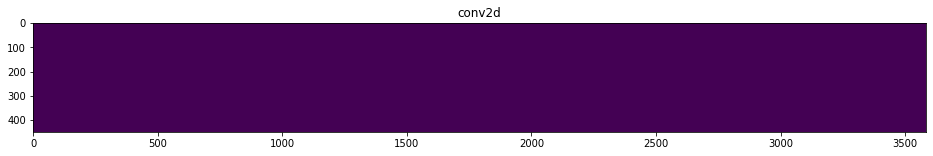

<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'conv2d')

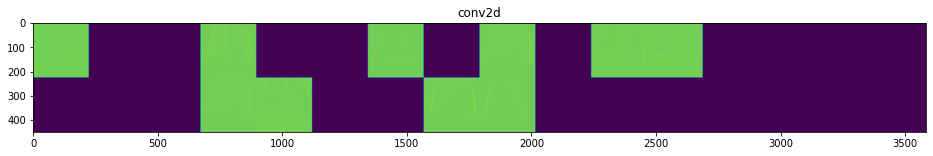

<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d')

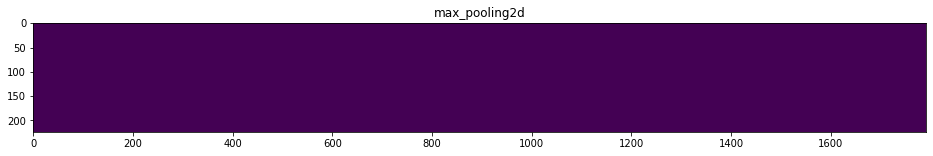

<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d')

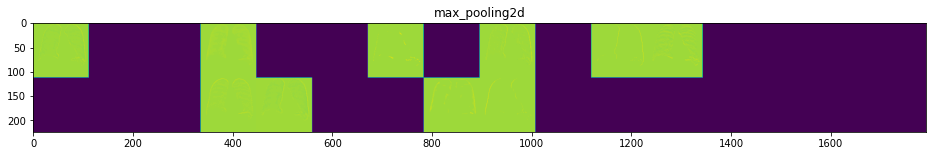

<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization')

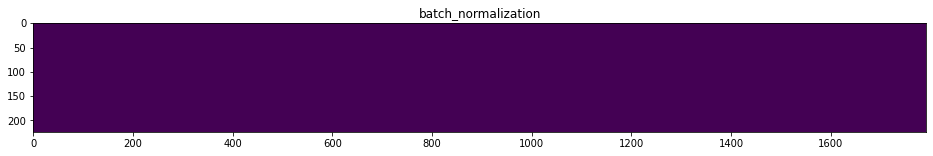

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract


<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization')

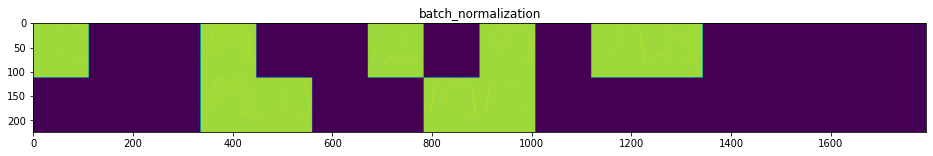

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'conv2d_1')

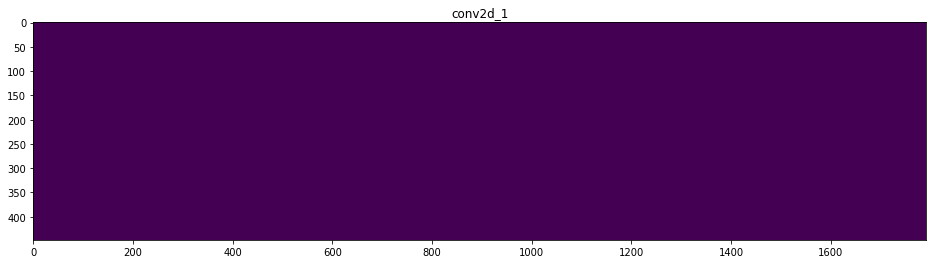

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'conv2d_1')

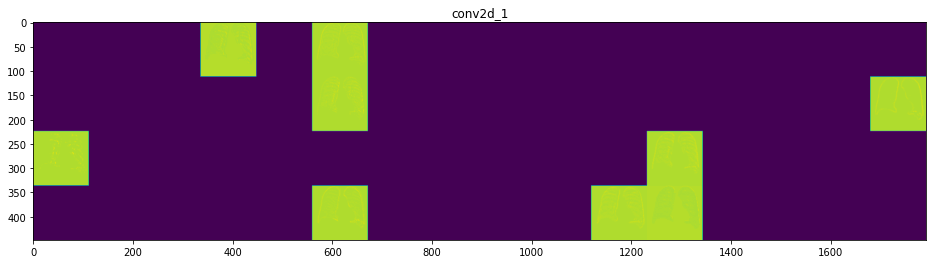

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'conv2d_2')

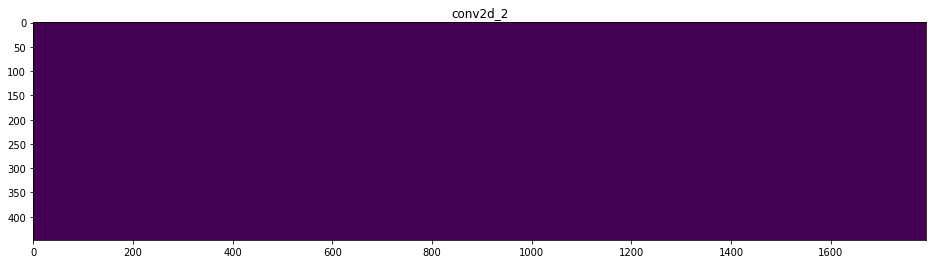

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'conv2d_2')

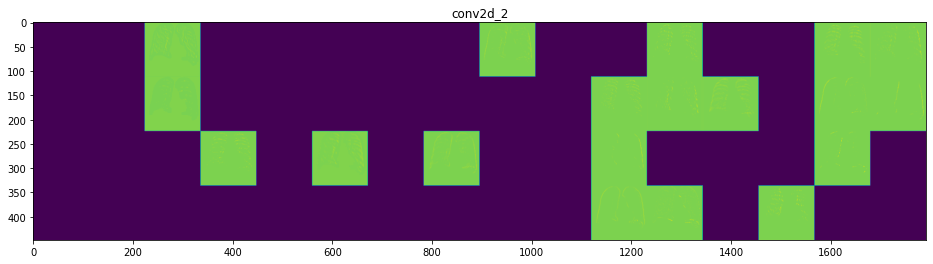

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_1')

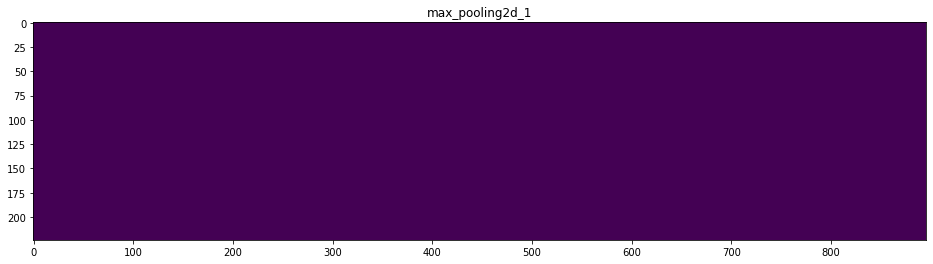

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_1')

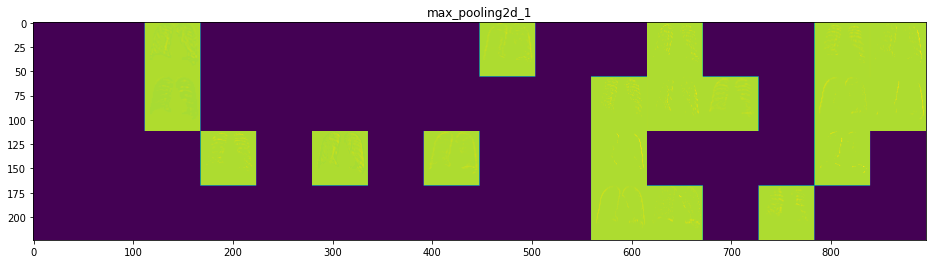

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_1')

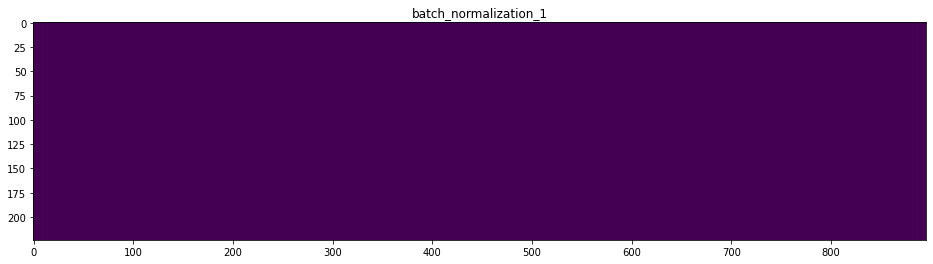

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_1')

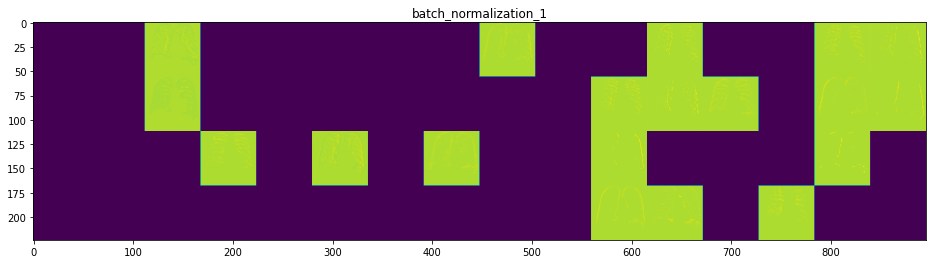

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'conv2d_3')

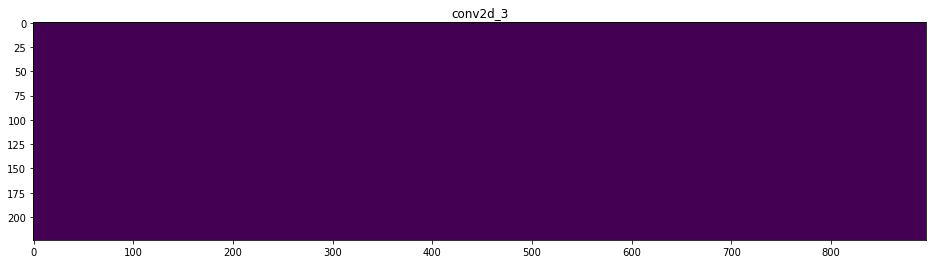

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'conv2d_3')

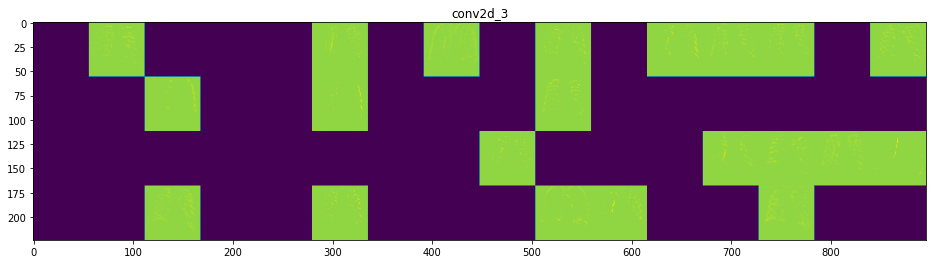

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_2')

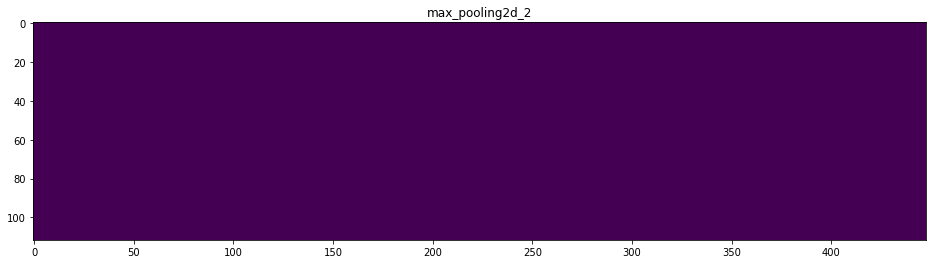

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_2')

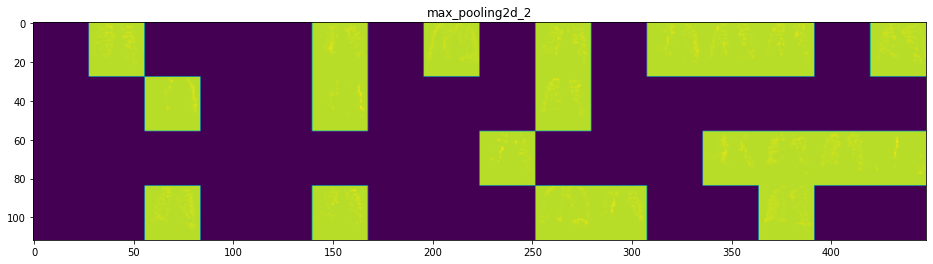

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_2')

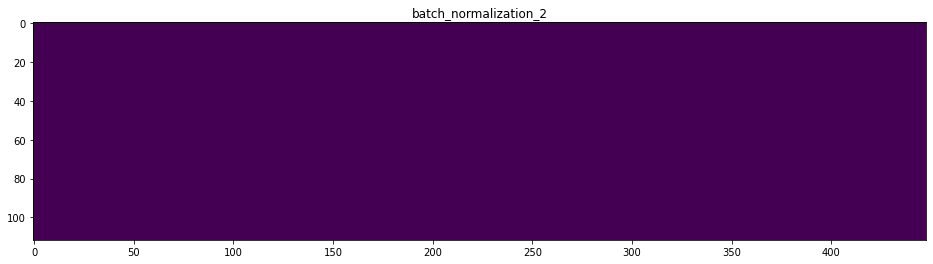

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_2')

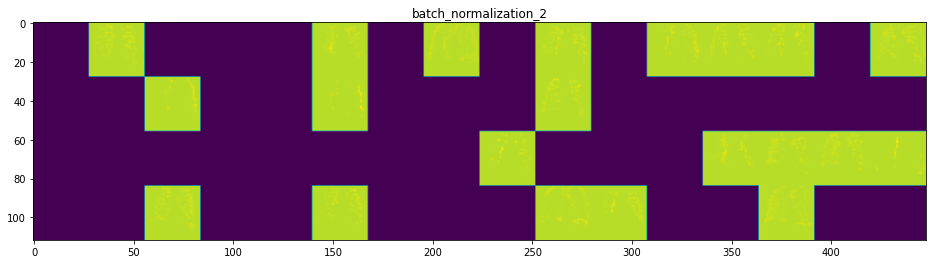

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'conv2d_4')

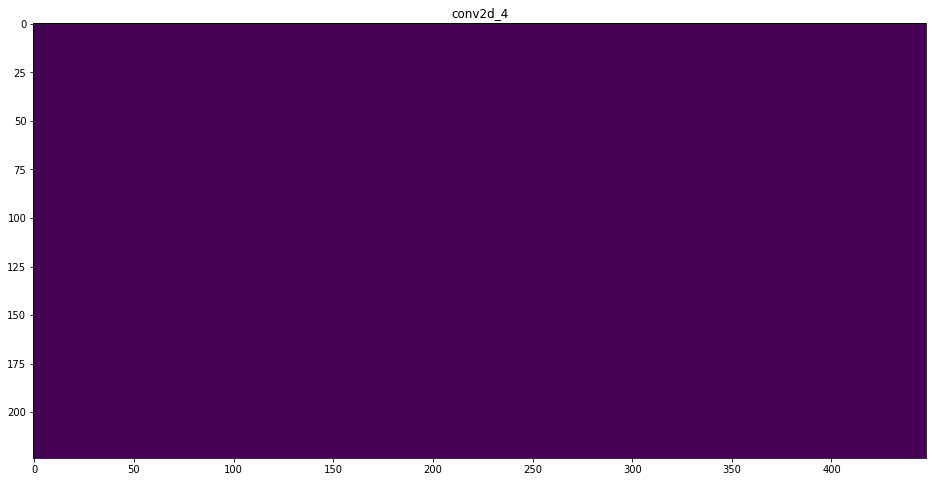

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'conv2d_4')

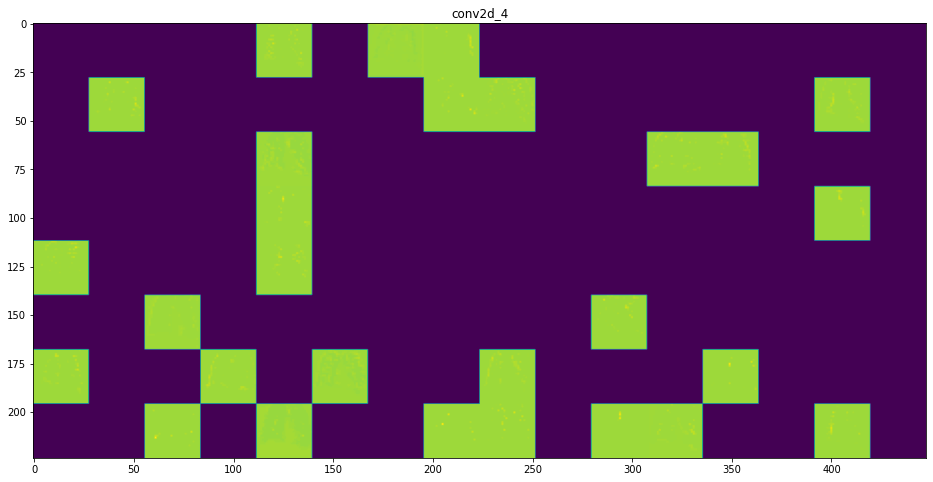

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_3')

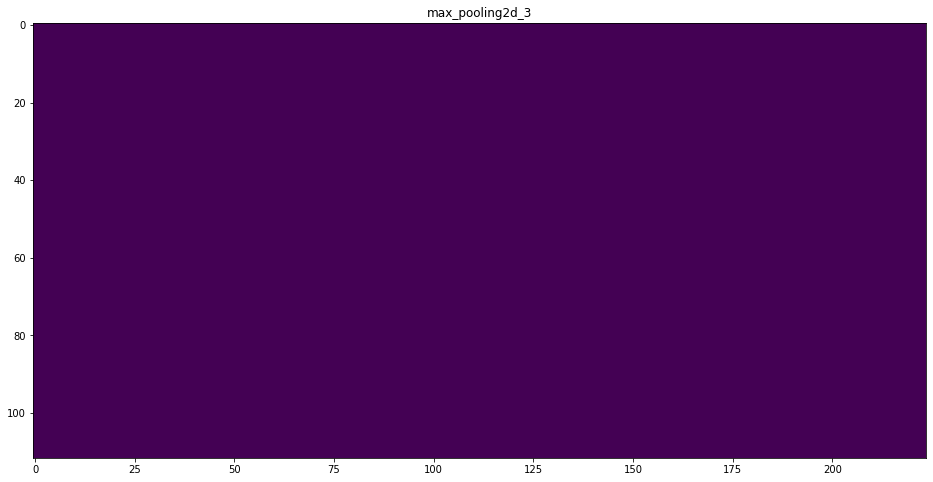

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_3')

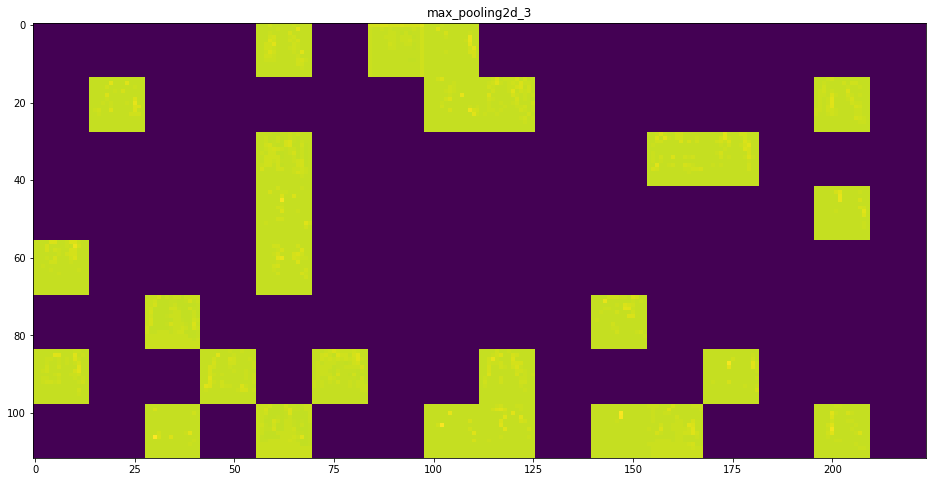

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_3')

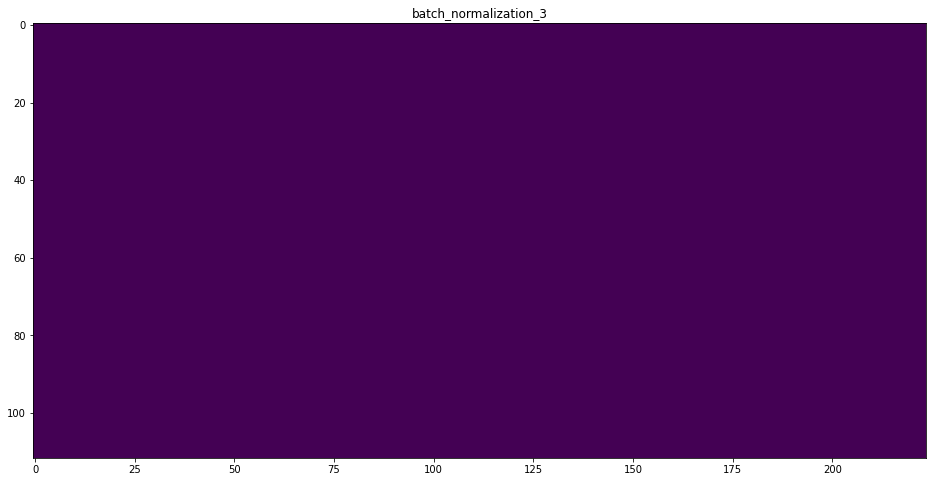

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_3')

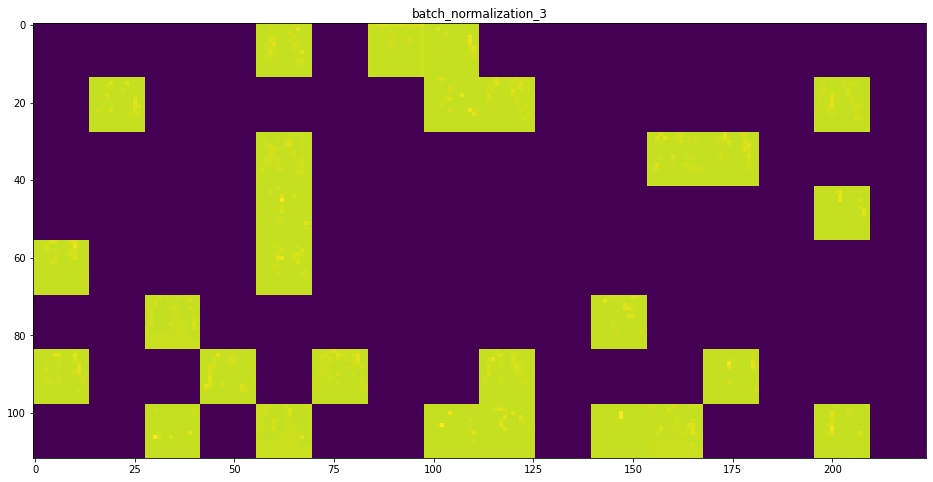

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'conv2d_5')

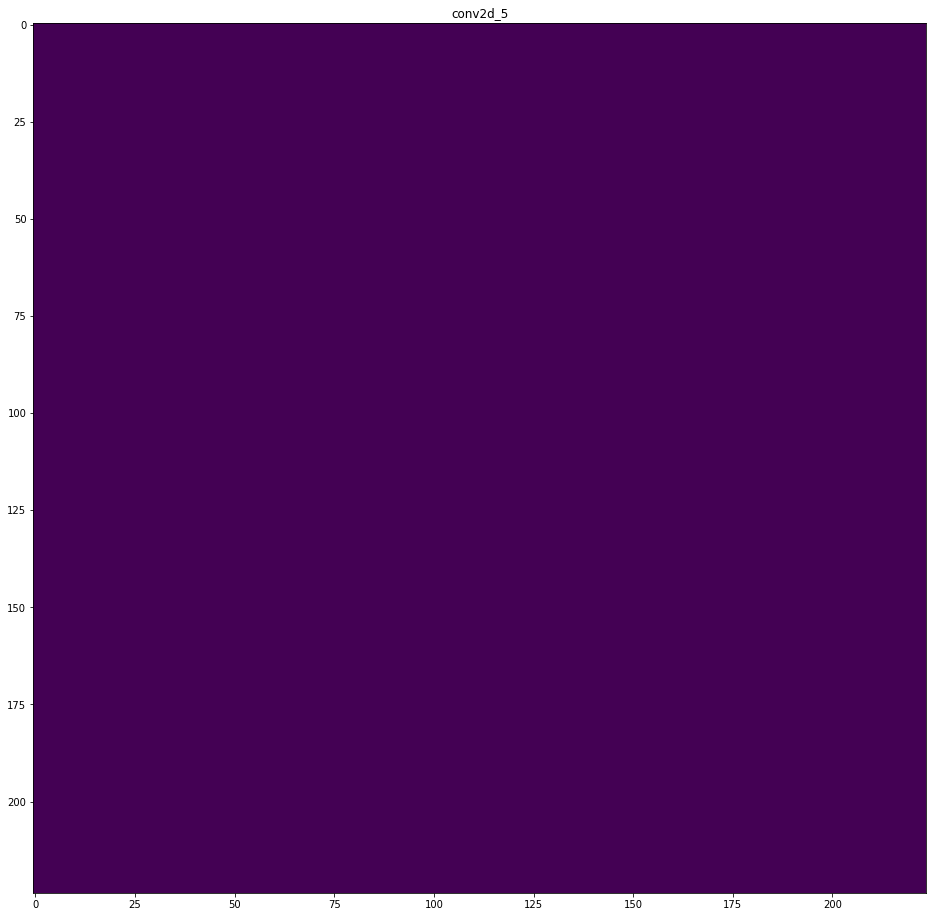

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'conv2d_5')

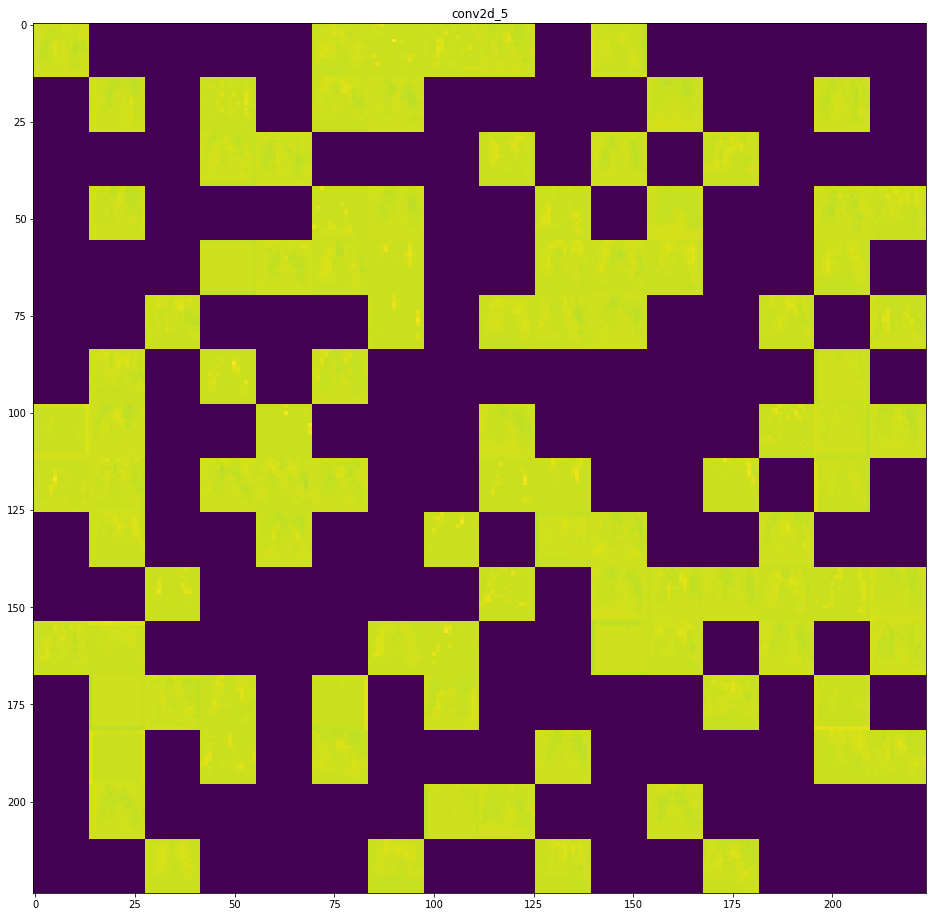

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_4')

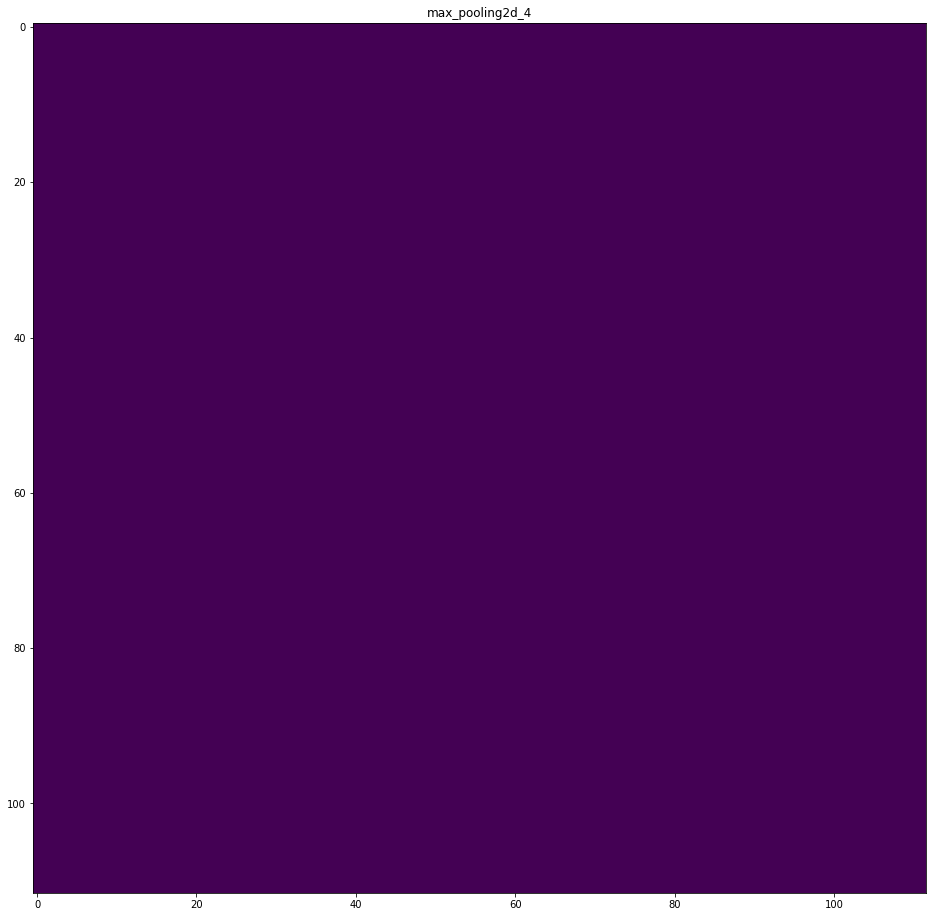

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_4')

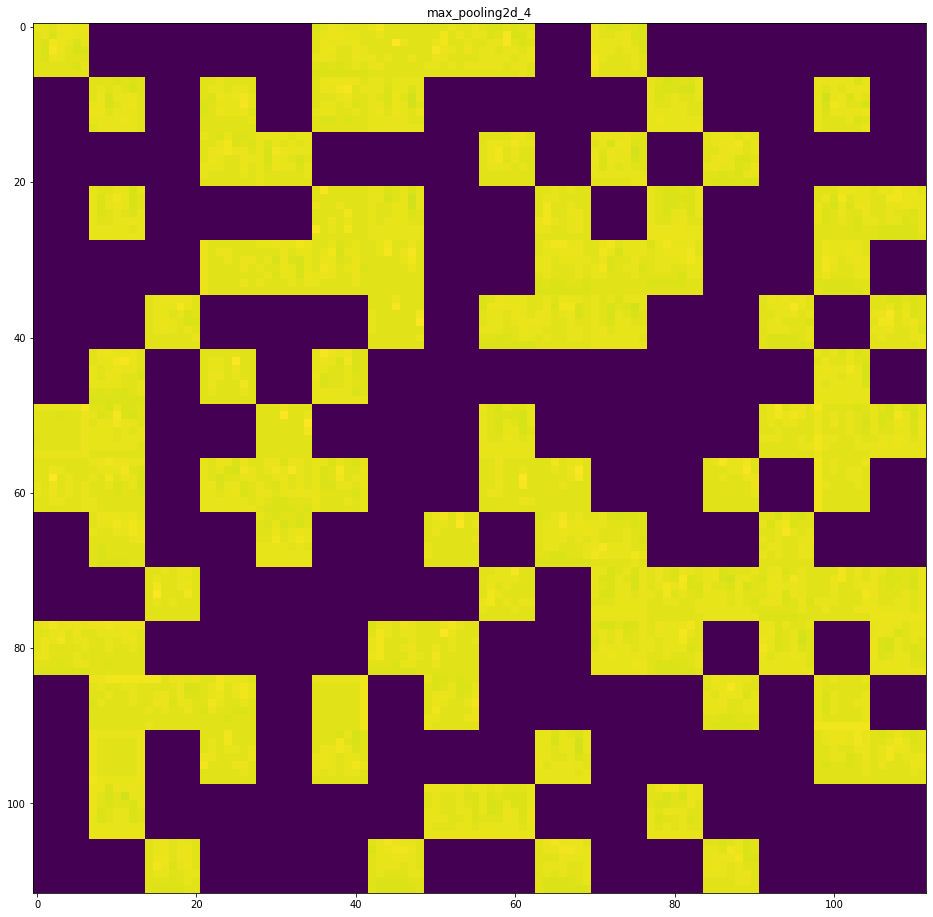

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_4')

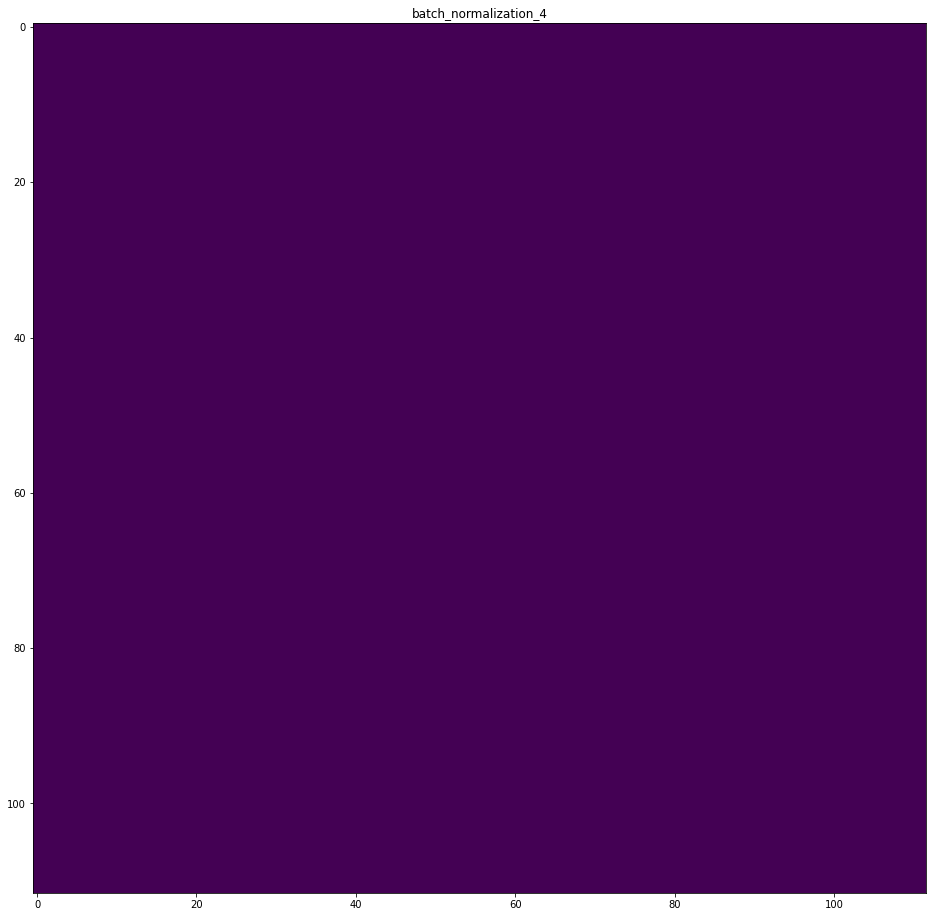

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'batch_normalization_4')

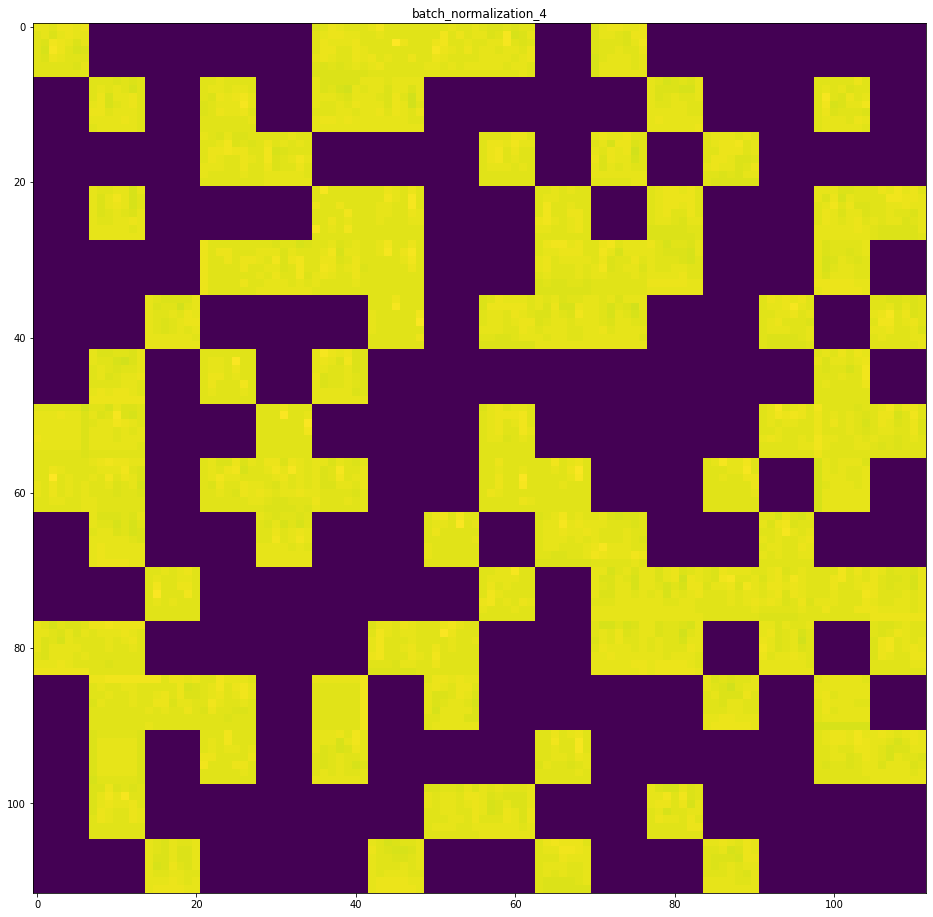

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'conv2d_6')

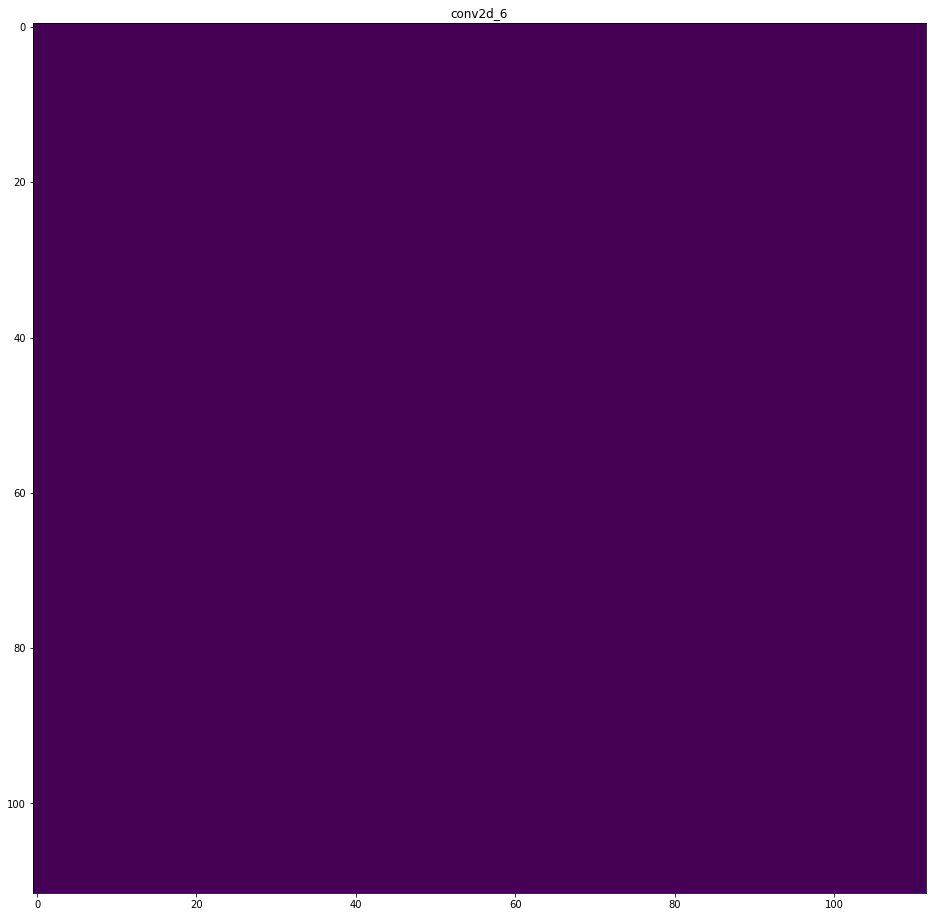

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'conv2d_6')

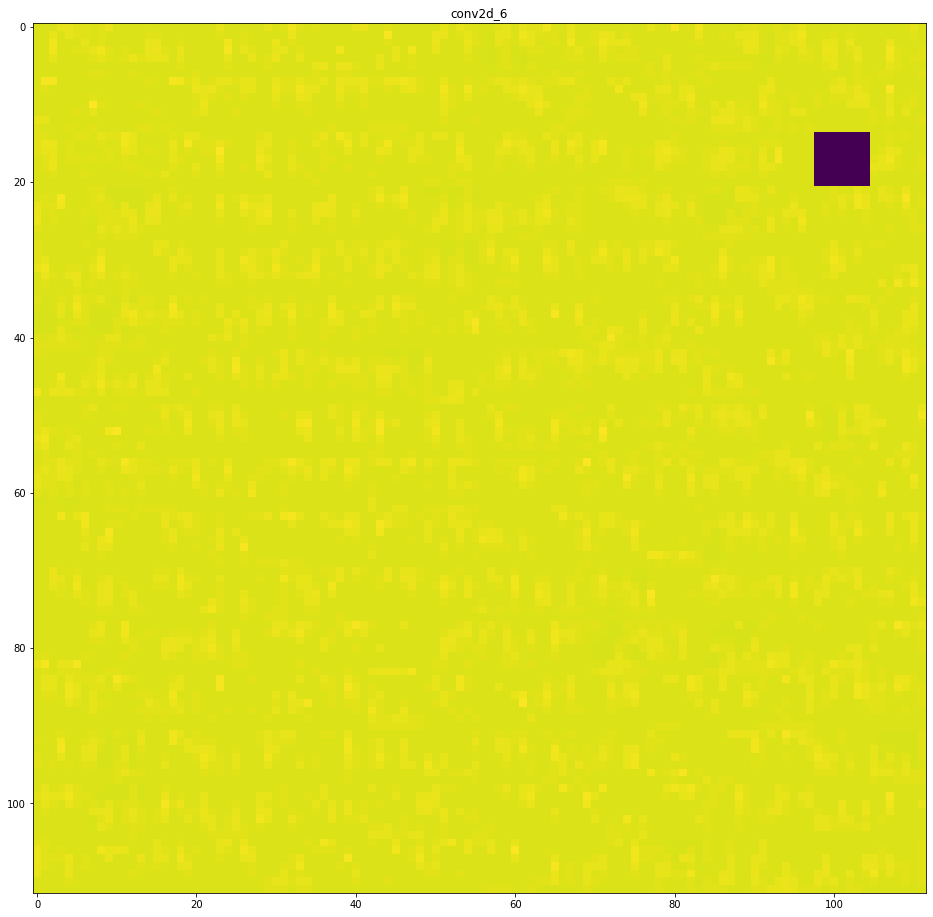

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_5')

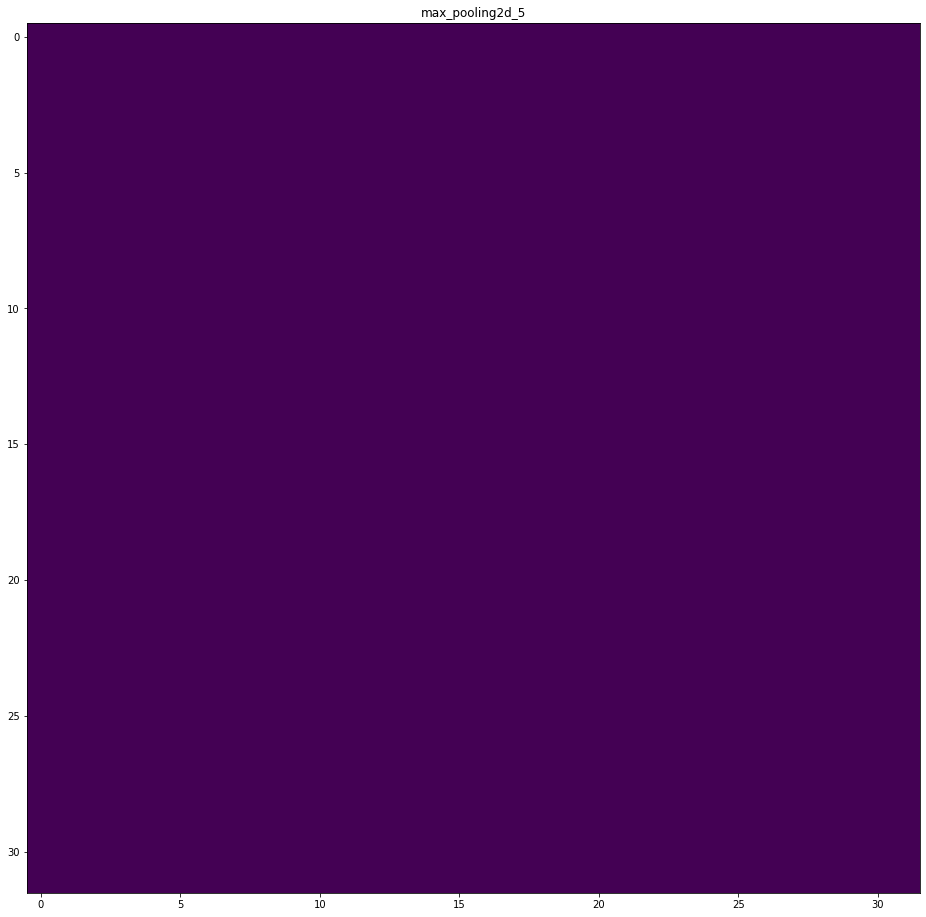

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_5')

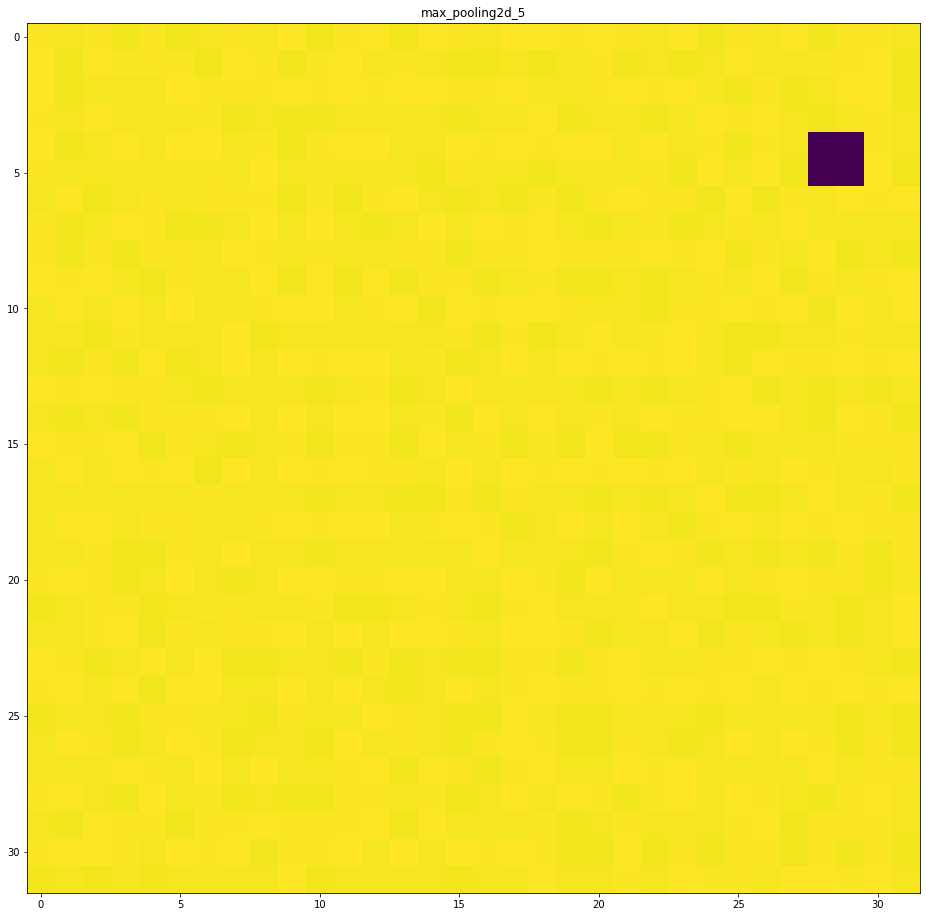

In [23]:
## VISUALIZACIÓN
## =============================================================================

layer_names = []
for layer in model_2.layers[:18]:
    layer_names.append(layer.name)
    
images_per_row = 16

image_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # Número de canales de salida por cada capa de red
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')

            
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show();   